# Temperature changes - San Diego

In [36]:
from scipy.stats import norm, uniform, t
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from matplotlib import axes 
import pandas as pd


In [5]:
data = pd.read_csv("temperature.csv")
data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [6]:
# This sets the size and properties of the plots when using matplotlib.pyplot
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn-poster'])


Plot a histogram with 100 bins for San Diego

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


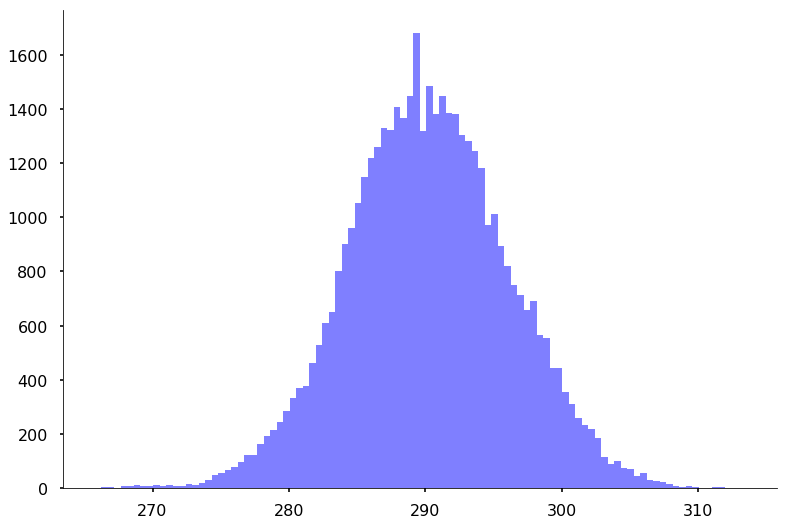

In [7]:
x = data['San Diego']
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Solution 2:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./temperature.csv')
df = df.loc[:, ['San Diego']]

all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

plt.hist(all_temperature, bins = 100)
plt.show()

The sample mean and variance over the data's duration

In [14]:
#discrad nan?
all_temperature = x
all_temperature = all_temperature[~np.isnan(all_temperature)]
mean = sum(all_temperature)/len(all_temperature)
print(mean)

t=0.
for i in all_temperature:
    t = t+(i-mean)**2

variance = (1/(len(all_temperature)-1))*t

print(variance)

290.21504416532485
34.69200770362536


solution 2: 
import numpy as np
import pandas as pd

df = pd.read_csv('./temperature.csv')
df = df.loc[:, ['San Diego']]

all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

mu_all = np.mean(all_temperature)
var_all = np.var(all_temperature, ddof=1)

print('The sample mean is {}'.format(mu_all))
print('The sample variance is {}'.format(var_all))

The sample mean in February 2013

In [31]:
df = data
df = df[(df['datetime'] >= '2013-02-01 00:00:00') & (df['datetime'] <= '2013-02-29 23:59:59')]
mean_feb = np.mean(df['San Diego'])
print(mean_feb)


285.24695012400906


Solution 2:
import numpy as np
import pandas as pd

df = pd.read_csv('./temperature.csv')
df = df[ df['datetime'].str.contains('2013-02')]
df = df.loc[:, ['San Diego']]

temperature = df.values
temperature = temperature[~np.isnan(temperature)]

mu = np.mean(temperature)

print('The sample mean in February 2013 is {}'.format(mu))

The 90% confidence interval for February 2013 using the z-statistic, assuming the variance calculated in Q2

In [32]:
from math import sqrt
zp = norm.ppf((1+0.9)/2)
upper = mean_feb + (zp*variance/sqrt(len(df['San Diego']))) 
print(upper)
lower = mean_feb - (zp*variance/sqrt(len(df['San Diego'])))
print(lower)

287.4482137354183
283.04568651259984


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_csv('./temperature.csv')
df1 = df[ df['datetime'].str.contains('2013-02')]
df = df.loc[:, ['San Diego']]
df1 = df1.loc[:, ['San Diego']]

temperature = df1.values
temperature = temperature[~np.isnan(temperature)]
all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

n = len(temperature)
mu = np.mean(temperature)
s_all = np.std(all_temperature, ddof=1)

z_s = norm.ppf(0.95)
z_upper = s_all / (n ** 0.5) * z_s + mu
z_lower = -s_all / (n ** 0.5) * z_s + mu

print('The upper bound of z-test is {}'.format(z_upper))
print('The lower bound of z-test is {}'.format(z_lower))

The 90% confidence interval for February 2013 using the t-statistic

In [37]:
t1 = t.ppf(((1+0.9)/2),len(df['San Diego'])-1 )
upper = mean_feb + (t1*variance/sqrt(len(df['San Diego']))) 
print(upper)
lower = mean_feb - (t1*variance/sqrt(len(df['San Diego'])))
print(lower)

287.4512570363622
283.0426432116559


solution 2:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

df = pd.read_csv('./temperature.csv')
df1 = df[ df['datetime'].str.contains('2013-02')]
df = df.loc[:, ['San Diego']]
df1 = df1.loc[:, ['San Diego']]

temperature = df1.values
temperature = temperature[~np.isnan(temperature)]
all_temperature = df.values
all_temperature = all_temperature[~np.isnan(all_temperature)]

n = len(temperature)
mu = np.mean(temperature)
s = np.std(temperature, ddof=1)

t_s = t.ppf(0.95, n - 1)
t_upper = s / (n ** 0.5) * t_s + mu
t_lower = -s / (n ** 0.5) * t_s + mu

print('The upper bound of t-test is {}'.format(t_upper))
print('The lower bound of t-test is {}'.format(t_lower))